Скачивание датасета с kaggle.com (файл csv)

In [3]:
#Установка библиотеки Kaggle
!pip install kaggle

In [4]:
#Создание каталога с именем ".kaggle" в папке root (мы находимся в папке content, root находится на уровень выше)
!mkdir ~/.kaggle

In [6]:
#Копирование файла "kaggle.json" в созданный каталог (предварительно вручную файл "kaggle.json" загружен в папку content)
!cp kaggle.json ~/.kaggle/

In [7]:
#Назначение необходимого разрешения для файла (только владелец файла имеет полный доступ к чтению и записи этого файла)
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
#Скачивание датасета с kaggle
!kaggle datasets download rabieelkharoua/students-performance-dataset

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/66.2k [00:00<?, ?B/s]
100% 66.2k/66.2k [00:00<00:00, 165MB/s]


In [9]:
#Распаковка архива
!unzip students-performance-dataset.zip
#В итоге в папке content должны быть 2 файла: 'students-performance-dataset.zip' и 'Student_performance_data _.csv'

Archive:  students-performance-dataset.zip
  inflating: Student_performance_data _.csv  


Загрузка данных из файла csv

In [5]:
import data_loading as dl

file_path = 'Student_performance_data _.csv'
df = dl.load_data(file_path)
df = df.drop('StudentID', axis = 1) #просто уникальный идентификатор студента, в предсказании не поможет

Файл Student_performance_data _.csv найден
Файл не пустой
Файл успешно загружен


Визуализации

In [6]:
import data_visualization as dv

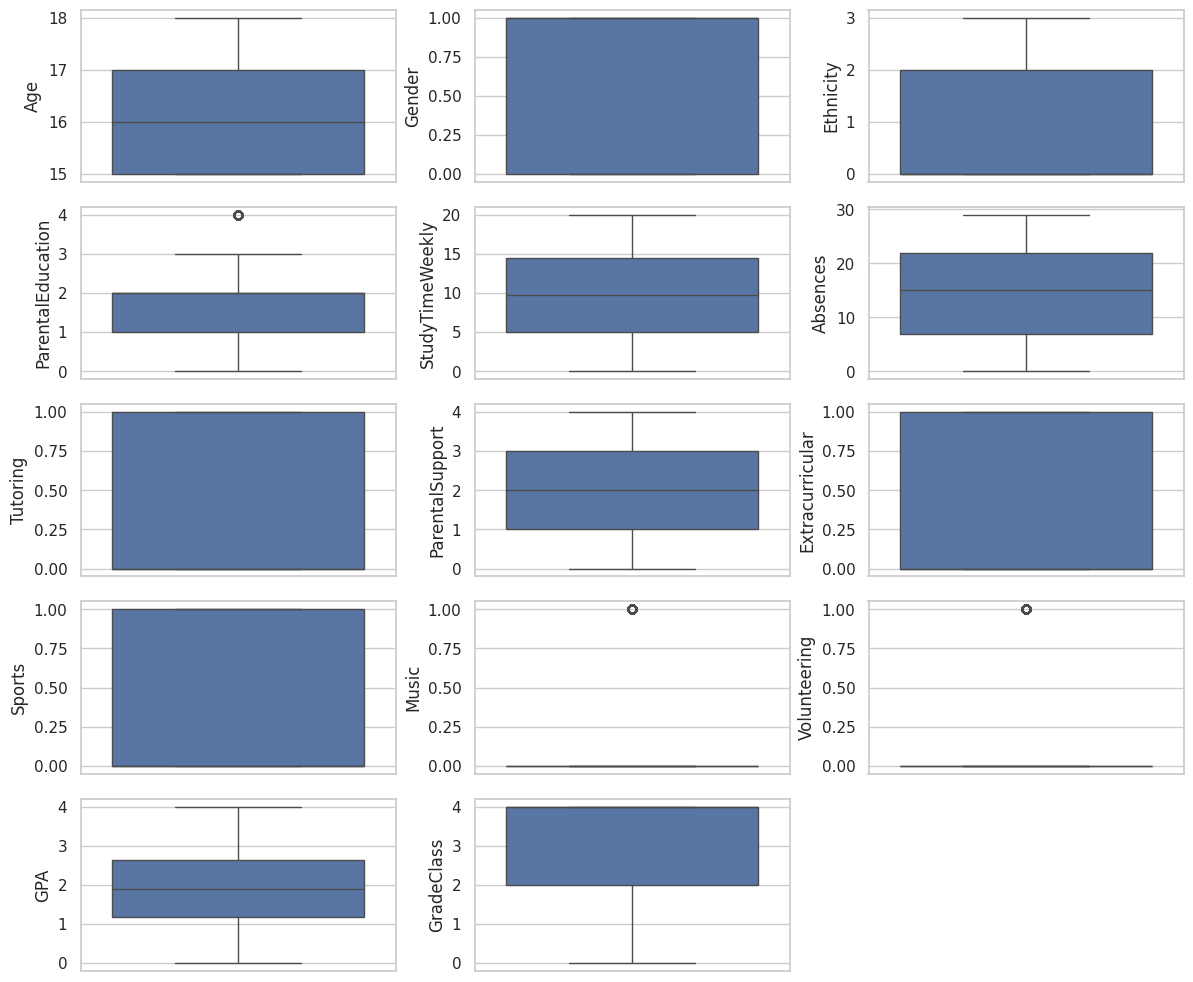

In [12]:
#Ящики с усами (на графиках видны выбросы в столбцах ParentalEducation, Music, Volunteering)
dv.boxplot_visualization(df)

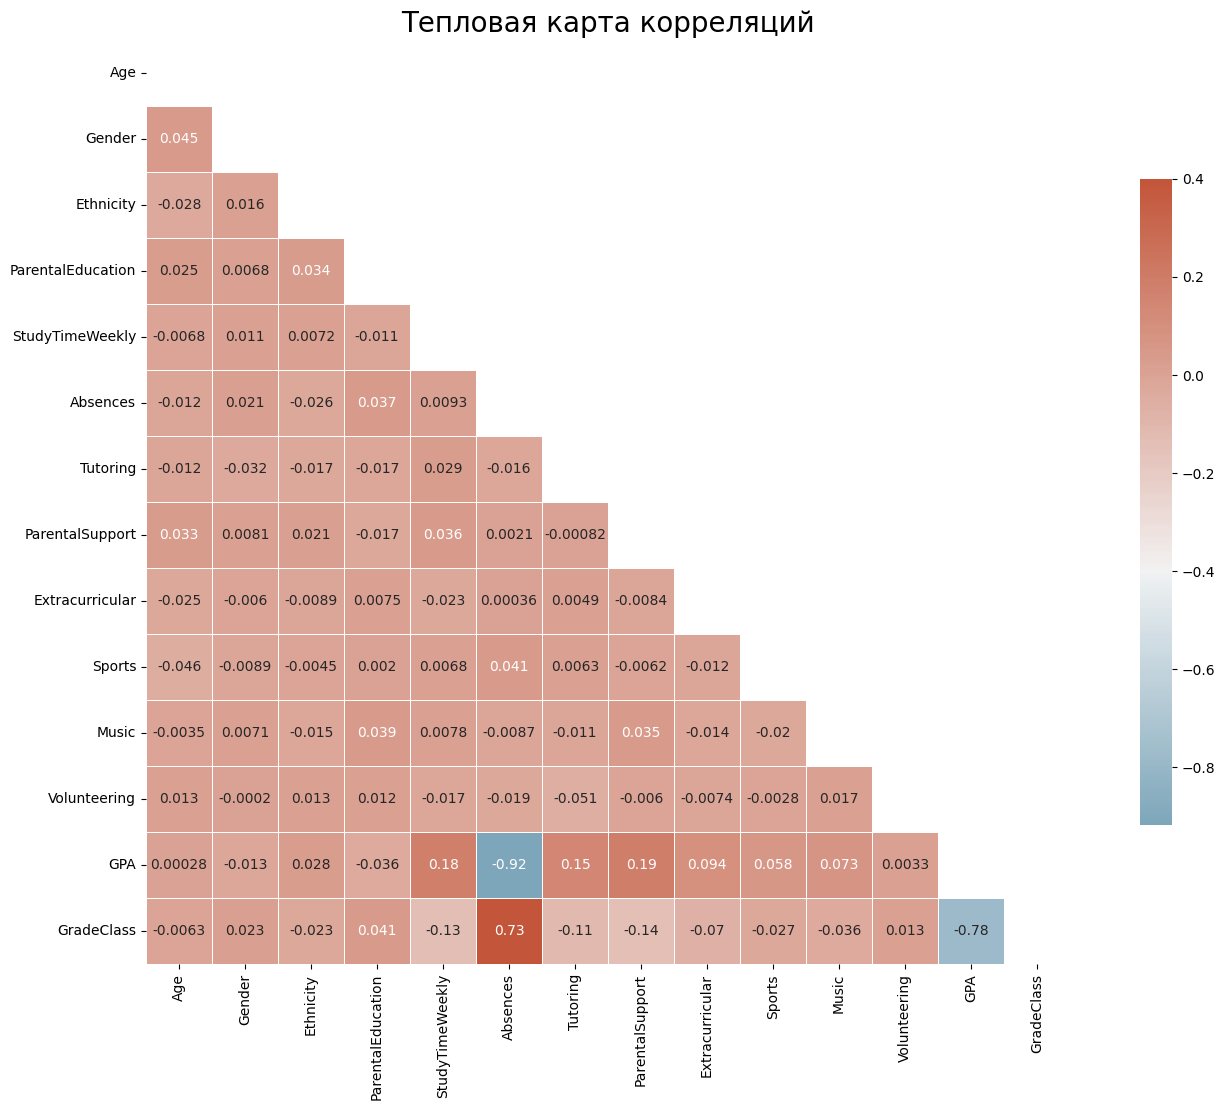

In [3]:
#Тепловая карта
dv.heatmap_visualization(df)

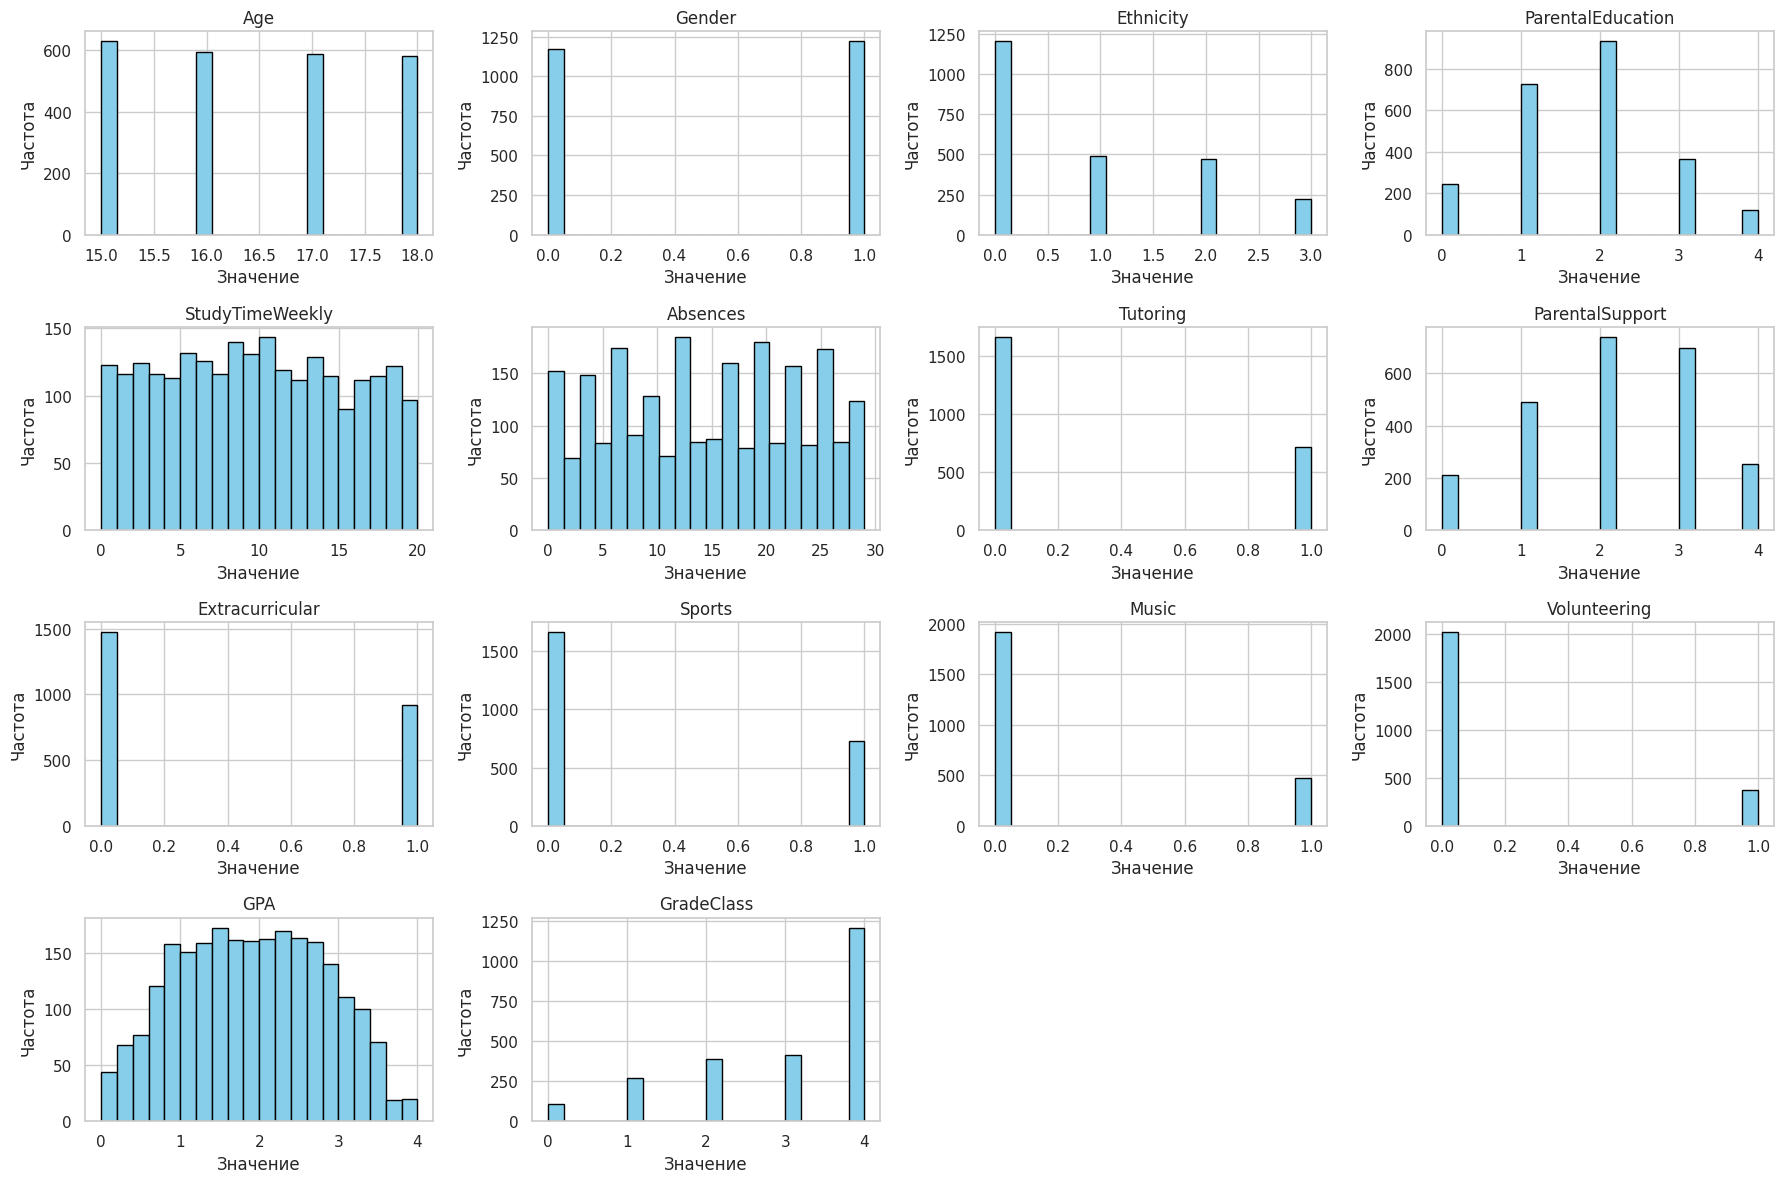

In [14]:
dv.hist_visualization(df)

Анализ пустых значений

In [7]:
import data_processing as dp

In [4]:
dp.analise_nulls(df) #Показывает количество столбцов с пустыми значениями
dp.show_nulls(df) #Показывает количесто пустых значений для каждого столбца
df = dp.fill_nulls(df) #Заполняет пустые значения наиболее часто встречающимися значениями

Пропущенные значения отсутствуют
Пропущенные значения отсутствуют
Пропущенные значения отсутствуют, заполнение не выполнено


Предобработка данных

In [22]:
from sklearn.model_selection import train_test_split
import pandas as pd

numeric_features = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
categorical_features = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
target_column = 'GradeClass'

X = df.drop(columns=[target_column])
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25, stratify=y)

X_train_processed, y_train, preprocessor = dp.preprocess_data(pd.concat([X_train, y_train], axis=1), numeric_features, categorical_features, target_column)
X_test_processed = preprocessor.transform(X_test)

Обучение модели

In [23]:
import train_model as tm

In [26]:
# Обучение модели
model = tm.train(X_train_processed, y_train)

# Предсказание на тестовых данных
y_pred = tm.predict(model, X_test_processed)

# Оценка модели
accuracy, report, confusion = tm.evaluate(y_test, y_pred)
print(f"Точность: {accuracy}")
print(f"Отчет о классификации:\n {report}")

Точность: 0.9227557411273486
Отчет о классификации:
               precision    recall  f1-score   support

         0.0       0.92      0.52      0.67        21
         1.0       0.87      0.83      0.85        54
         2.0       0.91      0.92      0.92        78
         3.0       0.91      0.90      0.91        83
         4.0       0.94      0.98      0.96       243

    accuracy                           0.92       479
   macro avg       0.91      0.83      0.86       479
weighted avg       0.92      0.92      0.92       479



Визуализация матрицы ошибок

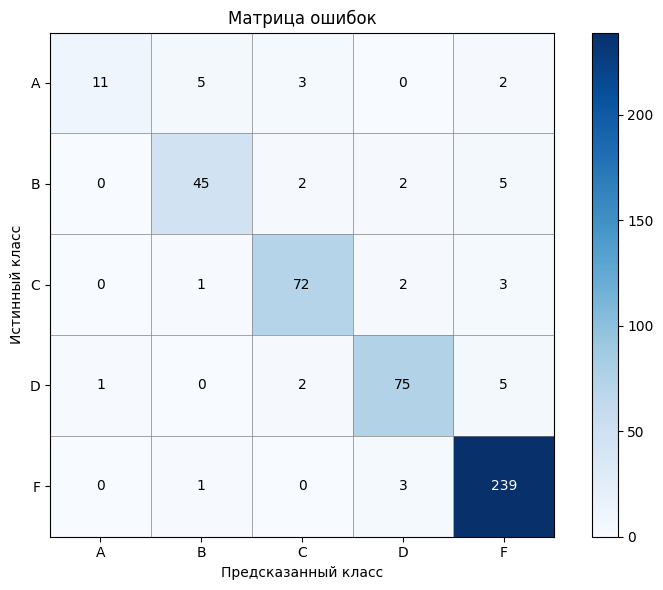

In [27]:
tm.plot_predictions(confusion, ['A', 'B', 'C', 'D', 'F'])